# Rabbit-mouse integration with SAMap

Note that this integration was performed using SAMap version 0.1.6. Please see https://github.com/atarashansky/SAMap for the latest version and documentation.  

## Setup

In [20]:
from samap.mapping import SAMAP
from samap.analysis import get_mapping_scores, GenePairFinder
from samalg import SAM
from samap.utils import save_samap, load_samap
import pandas as pd
import csv
import scanpy as sc
import numpy as np
import scrabbit

sc.set_figure_params(dpi_save=600)
sc.settings.figdir = "plots/"

## Load data

In [ ]:
r_data = sc.read_h5ad("data-in/r_data.h5ad")
m_data = sc.read_h5ad("data-in/m_data.h5ad")

In [ ]:
# Load most up-to-date cell type annotation
m_meta = pd.read_csv("../data-in/mouse/meta.tsv", sep="\t")
r_celltypes = pd.read_csv("../data-in/celltype_annotation/annotations_08-03-22.tsv", sep="\t", index_col=0)

### Compute feature mapping

The BLAST alignment step of the SAMap pipeline was performed using CDS sequences with transcript annotations. Here we relate the Ensembl transcript IDs with gene IDs present in the anndata object. This is provided to SAMAP in the `names` parameter. 

In [7]:
# Rabbit
r_ensembl = pd.read_csv("data-in/r_transcript_data.tsv",sep="\t")
r_genes = pd.read_csv("data-in/r_genes.tsv",sep="\t")
r_names = [(y,x) for x in r_genes["x"] for y in r_ensembl.loc[r_ensembl["ensembl_gene_id"]==x,"ensembl_transcript_id_version"]]

In [73]:
# Mouse
m_ensembl = pd.read_csv("data-in/m_transcript_data.tsv",sep="\t")
m_genes = pd.read_csv("data-in/m_genes.tsv",sep="\t")
m_names = [(y,x) for x in m_genes["x"] for y in m_ensembl.loc[m_ensembl["ensembl_gene_id"]==x,"ensembl_transcript_id_version"]]

In [13]:
# Save mapping
np.savetxt("data/r_names.tsv", r_names, delimiter="\t", fmt='%s')
np.savetxt("data/m_names.tsv", m_names, delimiter="\t", fmt='%s')

### Load pre-computed feature mappings

In [4]:
# with open(data_path +'r_names.tsv') as f:
#     r_names=[tuple(line) for line in csv.reader(f,delimiter='\t')]

In [54]:
# with open('data/m_names.tsv') as f:
#     m_names=[tuple(line) for line in csv.reader(f,delimiter='\t')]

## Prepare SAMs

In [45]:
r_sam = sc.external.tl.sam(r_sam,inplace=True)
m_sam = sc.external.tl.sam(m_sam,inplace=True)

RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8401708173504092
Iteration: 2, Convergence: 0.01157937752451288
Computing the UMAP embedding...
Elapsed time: 1688.1016952991486 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.846876451565616
Iteration: 2, Convergence: 0.011663026533466018
Computing the UMAP embedding...
Elapsed time: 1426.7018620967865 seconds


In [75]:
sm = SAMAP(r_sam, m_sam, "ra", "mo", f_maps=base_path + "integration/SAMap/maps/", names1=r_names, names2=mext_names, save_processed=False)

Preparing data 1 for SAMap.
Preparing data 2 for SAMap.
Coarsening gene connectivity graph using labels `ra`, round 0.
Coarsening gene connectivity graph using labels `ra`, round 1.
Coarsening gene connectivity graph using labels `mo`, round 0.
Coarsening gene connectivity graph using labels `mo`, round 1.
19947 `ra` genes and 18370 `mo` gene symbols match between the datasets and the BLAST graph.


## Run SAMAP

In [76]:
sm_out = sm.run()

Stitching SAM 0 and SAM 1
Found 179053 gene pairs
Recomputing PC projections with gene pair subsets...
Running hsnwlib
Using leiden_clusters and leiden_clusters cluster labels.
Out-neighbor smart expansion 1
Out-neighbor smart expansion 2
Indegree coarsening
0/22 (0, 146133) False
1/22 (20000, 146133) False
2/22 (40000, 146133) False
3/22 (60000, 146133) False
4/22 (80000, 146133) False
5/22 (100000, 146133) False
6/22 (120000, 146133) False
7/22 (140000, 146133) False
8/22 (160000, 146133) False
9/22 (180000, 146133) False
10/22 (200000, 146133) False
11/22 (220000, 146133) False
12/22 (240000, 146133) False
13/22 (260000, 146133) False
14/22 (280000, 146133) False
15/22 (300000, 146133) False
16/22 (320000, 146133) False
17/22 (340000, 146133) False
18/22 (360000, 146133) False
19/22 (380000, 146133) False
20/22 (400000, 146133) False
21/22 (420000, 146133) False
Concatenating SAM objects...
ITERATION: 0 
Average alignment score (A.S.):  0.7517535815644636 
Max A.S. improvement: 0.89

In [ ]:
# Export results
save_samap(sm, "data-out/rm_sm_out.samap")
save_samap(sm_out,"data-out/rm_sm_out.samap")
sm_out.adata.write("data-out/rm_sm_out.h5ad")

In [ ]:
# Load precomputed results
# sm = load_samap("data-out/rm_sm.samap")
# sm_out = load_samap("data-out/rm_sm_out.samap")
# sm_out_adata = sc.read_h5ad("../data-out/integration/oc_mm_integrated.h5ad")

# Plot SAMAP results

... storing 'celltype' as categorical
... storing 'stage' as categorical


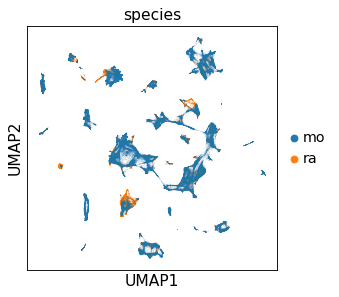

In [84]:
sc.pl.umap(sm_out.adata,color=["species"], save="_samap_species.pdf")

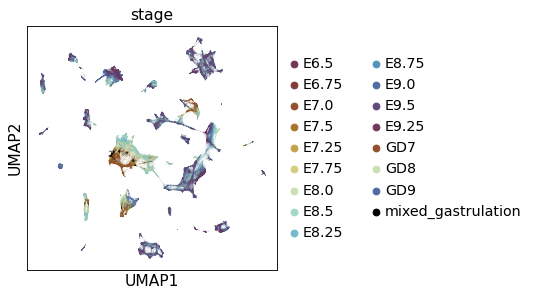

In [87]:
sc.pl.umap(sm_out.adata,color=["stage"],save="_samap_stage.pdf")

In [11]:
rm_samap.obs["updated_celltype"] = updated_celltypes

In [22]:
celltype_colour_list = [ext_celltype_colours[x] for x in np.unique(sm_out.adata.obs["updated_celltype"])]
sm_out.adata.uns["updated_celltype_colors"] = celltype_colour_list

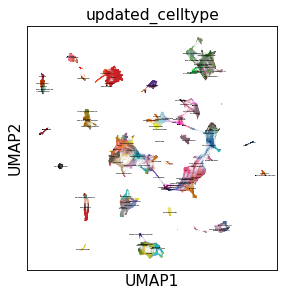

In [36]:
sc.pl.umap(sm_out.adata, color=["updated_celltype"],legend_loc='on data',legend_fontsize=1,save="_samap_updated_celltype_wtext.pdf")

### Recompute UMAP

In [ ]:
sc.pp.neighbors(sm_out.adata, n_neighbors=150)

         Falling back to preprocessing with `sc.pp.pca` and default params.
/nfs/research1/marioni/dkeitley/anaconda/envs/SAMap/lib/python3.7/site-packages/scanpy/preprocessing/_pca.py:312: RuntimeWarning: invalid value encountered in true_divide
  ev_ratio = ev / total_var


In [57]:
sc.tl.umap(sm_out.adata,min_dist=0.8)
#np.savetxt("data-out/rm_sm_umap_mindist0_8.tsv", sm_out.adata.obsm["X_umap"], delimiter="\t")

/nfs/research1/marioni/dkeitley/anaconda/envs/SAMap/lib/python3.7/site-packages/umap/spectral.py:319: RuntimeWarning: divide by zero encountered in true_divide
  1.0 / np.sqrt(diag_data), 0, graph.shape[0], graph.shape[0]


In [273]:
# Load UMAP
# sm_umap = pd.read_csv("data-out/rm_sm_umap_mindist0_8.tsv",sep="\t", header=None)
# sm_umap.index = rm_samap.obs.index
# rm_samap.obsm["X_umap"] = sm_umap

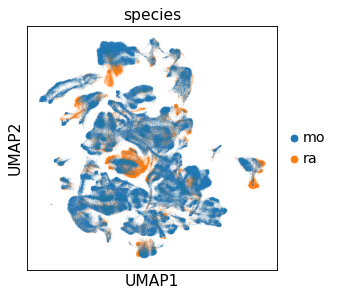

In [60]:
sc.pl.umap(sm_out.adata,color=["species"],save="_samap_species_min_dist_08.pdf")

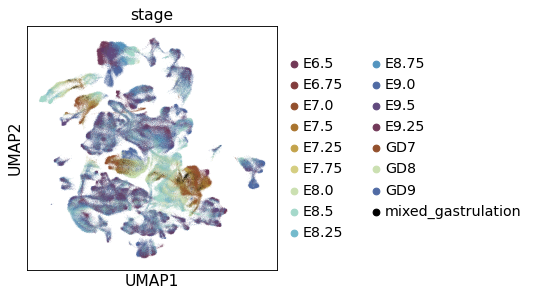

In [61]:
sc.pl.umap(sm_out.adata, color=["stage"],save="_samap_stage_min_dist_08.pdf")

In [70]:
# Remove prefix from celltypes
sm_out.adata.obs["celltype"] = [ct[3:] for ct in rm_samap.obs["celltype"]]
sm_out.adata.obs["stage"] = [st[3:] for st in rm_samap.obs["stage"]]

In [292]:
# Add latest cell type annotations to SAMAP objects
updated_celltypes = r_celltypes["assigned_celltype"].append(m_meta["celltype.clustering"])
updated_celltypes.index = sm_out.adata.obs.index

In [293]:
# Append species tag to cell types so each species can be highlighted in sc.pl.umap
sm_out.adata.obs["celltype"] = updated_celltypes
sm_out.adata.obs["species_celltype"] =  sm_out.adata.obs["species"].astype(str).str.cat(updated_celltypes, sep='')
#rm_samap.obs["species_celltype"] =  rm_samap.obs['species_celltype'].cat.rename_categories(np.unique(rm_samap.obs['species_celltype']))
sm_out.adata.obs["species_celltype"].head()

cell_1            raEpiblast
cell_2           raHypoblast
cell_4    raPrimitive Streak
cell_5         raTrophoblast
cell_6    raNascent mesoderm
Name: species_celltype, dtype: object

In [294]:
# Add cell type colours
celltype_colours = scrabbit.plot_utils.getCelltypePalette()
celltype_colour_list = [celltype_colours[x[2:]] for x in np.unique(sm_out.adata.obs["species_celltype"])]
sm_out.adata.uns["species_celltype_colors"] = celltype_colour_list

celltype_colour_list = [celltype_colours[x] for x in np.unique(sm_out.adata.obs["celltype"])]
sm_out.adata.uns["celltype_colors"] = celltype_colour_list

stage_colours = [stage_colours_new[x] for x in np.unique(sm_out.adata.obs["stage"])]
sm_out.adata.uns["stage_colors"] = stage_colours

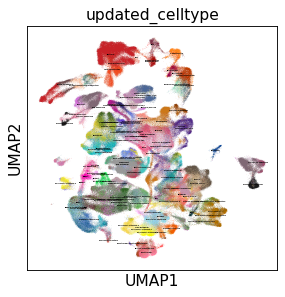

In [59]:
sc.pl.umap(sm_out.adata, color=["updated_celltype"], legend_loc='on data', legend_fontsize=1.5,
           save="_samap_updated_celltype_wtext_min_dist_08.pdf")

In [ ]:
# Plot rabbit cells separately
r_groups = [celltype for celltype in rm_samap.obs["species_celltype"].unique() if celltype.startswith('ra')]
sc.pl.umap(sm_out.adata, color=["species_celltype"],
            groups = r_groups, 
            title="Rabbit", legend_loc="none")
          #save="_mindist08_samap_celltype_rabbit_highlight.pdf")

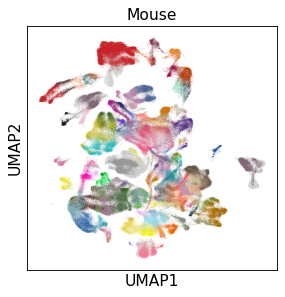

In [72]:
sc.pl.umap(rm_samap,color=["species_celltype"], groups=[celltype for celltype in rm_samap.obs["species_celltype"].unique() if celltype.startswith('mo')],
          palette=celltype_colour_list,save="_mindist08_samap_celltype_mouse_highlight.pdf",title="Mouse",legend_loc="none")